In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [21]:
# stop-loss logic using Momentum Strategy
ticker = 'AAPL'
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')[['Close']]
df.columns = ['price']

window = 50
df['ma'] = df['price'].rolling(50).mean()
df['position'] = np.where(df['price'] > df['ma'], 1, -1)
df['returns'] = df['price'].pct_change()
df['strategy'] = df['position'].shift(1) * df['returns']
df.dropna(inplace=True)

C:\Users\Alqama\AppData\Local\Temp\ipykernel_38508\3457634508.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-12-31')[['Close']]
[*********************100%***********************]  1 of 1 completed


In [23]:
df = apply_stop_loss(df, stop_loss_pct = 0.02)

In [25]:
# Implementation of a stop-loss logic that checks per-trade losses and closes the position if it breaches a threshold (e.g., -2%).
def apply_stop_loss(df, stop_loss_pct = 0.02):
    equity = [100_000]
    position = 0
    entry_price = None

    for i in range(1, len(df)):
        if df['position'].iloc[i] != position:
            position = df['position'].iloc[i]
            entry_price = df['price'].iloc[i]

        price = df['price'].iloc[i]
        if position != 0 and entry_price:
            pnl = (price - entry_price) / entry_price * position
            if pnl < -stop_loss_pct:
                position = 0;
                entry_price = None
        equity.append(equity[-1] * (1 + df['returns'].iloc[i] * position))

    df['equity_curve'] = equity
    return df

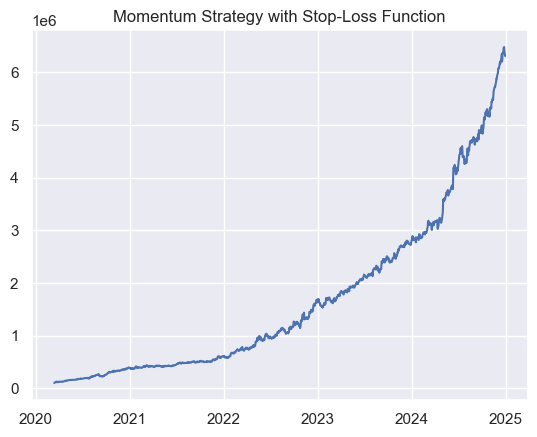

In [27]:
plt.plot(df['equity_curve'])
plt.title("Momentum Strategy with Stop-Loss Function")
plt.show()